LINEAR REGERSSION PRACTICAL IMPLEMENTATION

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
ds=fetch_california_housing()
print(ds.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
import pandas as pd
da=pd.DataFrame(ds.data,columns=ds.feature_names)
da

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
ds.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
da['price']=ds.target

In [6]:
da.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
da.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
da.duplicated().sum()

0

In [9]:
da.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [10]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
da.shape

(20640, 9)

In [12]:
da.ndim

2

In [13]:
da_copy=da.sample(frac=0.25)
da_copy.shape

(5160, 9)

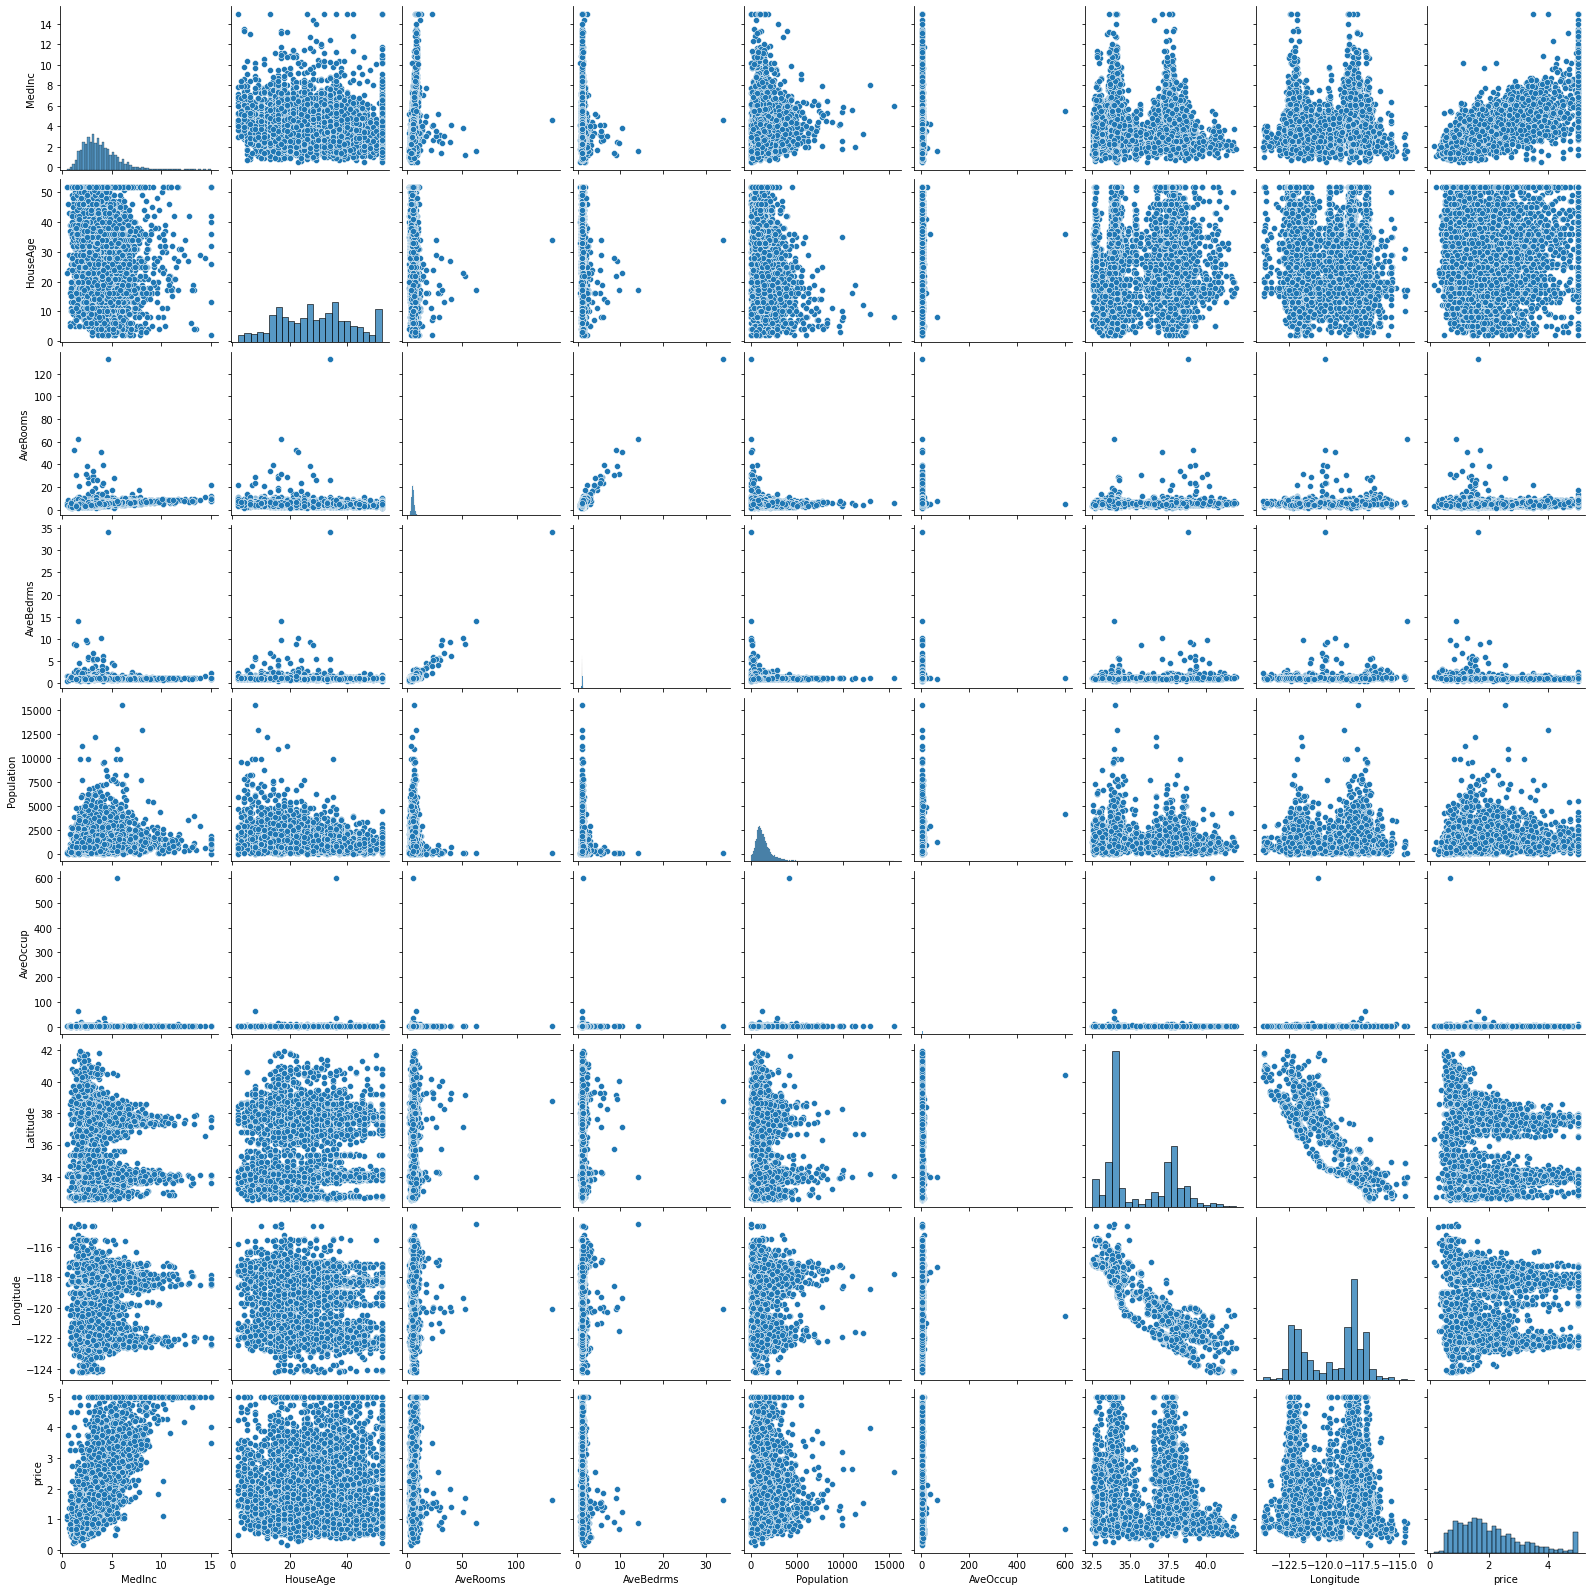

In [14]:
sns.pairplot(da_copy)

<AxesSubplot:>

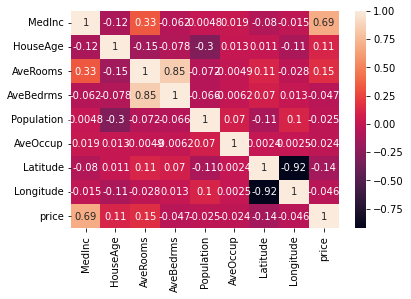

In [15]:
sns.heatmap(da.corr(),annot=True)

In [16]:
da.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


spliting independent and dependent variable

In [17]:
X=da.iloc[:,:-1]  #independent variable
y=da.iloc[:,-1]   #dependent variable

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=37)

In [19]:
X.shape

(20640, 8)

In [20]:
X_train.shape,X_test.shape 

((13828, 8), (6812, 8))

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 7.00136966e-01,  5.87127962e-01,  3.44674294e-02, ...,
         8.83953216e-04, -8.40753507e-01,  6.01047020e-01],
       [ 2.16222219e-01,  8.25232392e-01, -2.99907488e-01, ...,
        -6.82542655e-02, -7.56436523e-01,  5.51196619e-01],
       [-3.74121057e-01, -4.44657898e-01,  1.25039754e-01, ...,
        -1.70512058e-02,  2.03840230e-01,  2.57079253e-01],
       ...,
       [ 1.48333908e+00, -1.23833933e+00,  5.56350810e-01, ...,
         1.82784614e-03,  9.72061632e-01, -1.14371701e+00],
       [ 4.63153826e-03, -1.79391633e+00,  1.20925110e-01, ...,
         2.59279455e-02, -4.89432743e-01,  8.90179345e-01],
       [ 8.28304987e-01, -1.63518004e+00,  5.10583031e-01, ...,
        -2.83527396e-02,  1.42643649e+00, -7.10018525e-01]])

In [22]:
X_test=scaler.transform(X_test)
X_test

array([[-1.3930278 ,  1.14270496, -0.52396261, ...,  0.11139806,
        -0.77048935,  0.65089742],
       [-0.36092962,  1.38080939, -0.03068062, ..., -0.060934  ,
        -0.72364659,  1.11949119],
       [-1.15515977, -0.60339418, -0.44521896, ..., -0.02806695,
         1.64191322, -1.01909101],
       ...,
       [-1.06107843,  0.26965539, -0.27325462, ..., -0.05792726,
         0.33499998, -0.03703811],
       [ 0.3425962 ,  0.34902353,  0.02295116, ..., -0.02907325,
         0.95332452, -0.70503349],
       [ 0.03734631,  0.82523239,  0.02553309, ..., -0.04337175,
         0.71442641, -1.2783131 ]])

In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
reg.coef_

array([ 0.81626546,  0.12596432, -0.25153212,  0.29496317,  0.00175026,
       -0.04203583, -0.90493777, -0.87957032])

In [25]:
reg.intercept_


2.072560703644779

In [26]:
###prediction y_pred---->X_test
ypre=reg.predict(X_test)

In [27]:
ds.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
reg.predict([[9.3252,48.0,5.984127,1.023810,322.0,2.555556,37.88,-122.23]])

array([88.21446889])

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,ypre)
print(mse)
mae=mean_absolute_error(y_test,ypre)
print(mae)
print(np.sqrt(mse))

0.5054469925451228
0.528076524189442
0.7109479534713654


In [30]:
#ACCURACY OF MPDEL BY r2 & ADJUSTED R2
from sklearn.metrics import r2_score
sc=r2_score(y_test,ypre)
sc

0.6175745296165074

In [31]:
#display adjusted R-squared
1 - (1-sc)*(len(y)-1)/(len(y)-X.shape[1]-1)


0.6174262380279723

RIDGE LASSO AND ELASTIC_NET REGRESSION

In [32]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(X_train,y_train)



Ridge()

In [33]:
ypred=ri.predict(X_test)

In [34]:
mse=mean_squared_error(y_test,ypred)
print(mse)
mae=mean_absolute_error(y_test,ypred)
print(mae)
print(np.sqrt(mse))

0.5054531234449922
0.5280707781022588
0.7109522652365573


In [35]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(X_train,y_train)

Lasso()

In [36]:
ypred=la.predict(X_test)
ypred

array([2.0725607, 2.0725607, 2.0725607, ..., 2.0725607, 2.0725607,
       2.0725607])

In [37]:
mse=mean_squared_error(y_test,ypred)
print(mse)
mae=mean_absolute_error(y_test,ypred)
print(mae)
print(np.sqrt(mse))

1.3218346504209442
0.9072827917722829
1.1497106811806803


In [38]:
from sklearn.linear_model import ElasticNet
ela=ElasticNet()
ela.fit(X_train,y_train)

ElasticNet()

In [39]:
ypred=ela.predict(X_test)       #Xtest model fit to elasticnet in to (ypre)
ypred

array([1.80295626, 2.00270694, 1.84899287, ..., 1.86720123, 2.13886624,
       2.07978865])

In [40]:
mse=mean_squared_error(y_test,ypred)
print(mse)
mae=mean_absolute_error(y_test,ypred)
print(mae)
print(np.sqrt(mae))

1.0473505569744677
0.8079874019724643
0.8988811945816112


>>>>conclusion:Ridge is best fit to the model which gives minimal error